In [1]:
from PIL import Image as PILImage
from img2table.document import Image
from img2table.ocr import TesseractOCR, PaddleOCR
from colordict import ColorDict
from IPython.display import display_html
import cv2
import numpy as np

C:\Users\xavca\PycharmProjects\img2table\venv\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(
C:\Users\xavca\PycharmProjects\img2table\venv\lib\site-packages\skimage\util\dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [2]:
import random
colors = ColorDict()

def get_color():
    idx = random.randint(0, len(colors) - 1)
    return list(colors.values())[idx]

### Loading image

In [12]:
img = Image(r"C:\Users\xavca\Pictures\test_aws.jpg")
ocr = PaddleOCR()

In [13]:
tables = img.extract_tables(ocr=ocr, implicit_rows=True, borderless_tables=True)

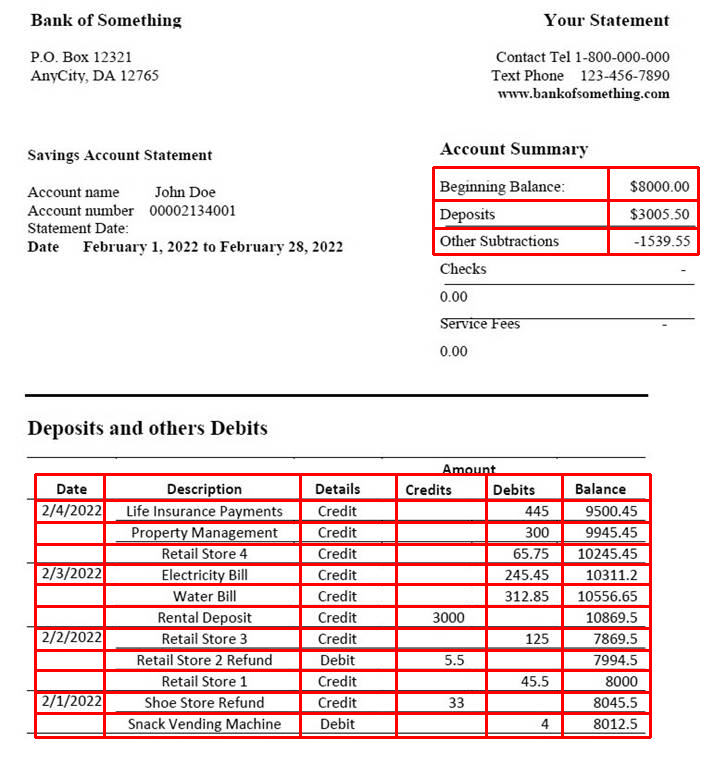

In [14]:
display_img = cv2.cvtColor(list(img.images)[0], cv2.COLOR_GRAY2RGB)

for table in tables:
    for row in table.content.values():
        for cell in row:
            cv2.rectangle(display_img, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2), (255, 0, 0), 2)
            
PILImage.fromarray(display_img)

In [15]:
for idx, table in enumerate(tables):
    display_html(table.html_repr(title=f"Extracted table n°{idx + 1}"), raw=True)

,0,1
0,Beginning Balance:,$8000.00
1,Deposits,$3005.50
2,Other Subtractions,-1539.55


,0,1,2,3,4,5
0,Date,Description,Details,Credits,Debits,Balance
1,2/4/2022,Life Insurance Payments,Credit,None,445,9500.45
2,None,Property Management,Credit,None,300,9945.45
3,None,Retail Store4,Credit,None,65.75,10245.45
4,2/3/2022,Electricity Bill,Credit,None,245.45,10311.2
5,None,Water Bill,Credit,None,312.85,10556.65
6,None,Rental Deposit,Credit,3000,None,10869.5
7,2/2/2022,Retail Store 3,Credit,None,125,7869.5
8,None,Retail Store 2 Refund,Debit,5.5,None,7994.5
9,None,Retail Store1,Credit,None,45.5,8000
